# Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

Generaremos nuestro dummie data set con el siguiente paquete `samples_generator` de `sklearn`.

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

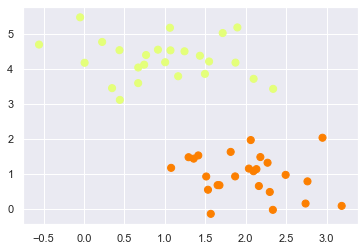

In [6]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="Wistia")
plt.show()

El objetivo es dibujar la línea recta que separe los dos grupos, creando un modelo de clasificación.

Inicialmente podríamos pensar que se puede hacer a mano. Sin embargo, para clasificar el punto que dibujamos con una `x` en rojo a continuación, cualquiera de las líneas podría ser váida.

(-1, 3.5)

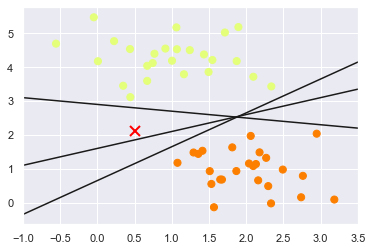

In [8]:
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="Wistia")
plt.plot([0.5],[2.1], 'x', color = 'red', markeredgewidth=2, markersize=10)

for a, b in [(1,0.65), (0.5,1.6), (-0.2,2.9)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    
plt.xlim(-1,3.5)

El ordenador no ve de manera directa la clasificación, como hemos hecho nosotros inicialmente.

## Maximización del margen

El problema, por tanto, se tratará de determinar cual de las rectas es el mejor clasificador (si es que se trata de alguna de las que hemos dibujado).

Podríamos optar por dibujar la recta con un pasillo (para eleminar las 0 dimensiones de la recta). El problema, entonces, sería el de maximizar ese corredor.

En el ejemplo, el corredor viene determinado por `d`, que ya tenemos calculado.

(-1, 3.5)

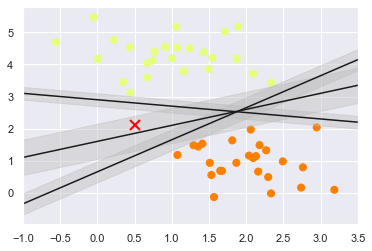

In [10]:
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="Wistia")
plt.plot([0.5],[2.1], 'x', color = 'red', markeredgewidth=2, markersize=10)

for a, b, d in [(1,0.65, 0.33), (0.5,1.6,0.55), (-0.2,2.9,0.2)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    plt.fill_between(xx, yy-d, yy+d, edgecolor=None, color='#BBBBBB', alpha=0.4)
    
plt.xlim(-1,3.5)

En los valores que hemos establecido para `d` y su representación gráfica vemos que:
* El primer modelo tiene un margen algo estrecho
* El segundo es el que mayor margen tiene
* El tercero es el modelo con menor margen

La técnica de maximización del margen es la que nos dará el mejor modelo posible para estos problemas de clasificación y establecer una separación lo más óptima posible.

### Creación del modelo SVM

Ahora emplearemos un algoritmo de SVM como clasificador cuyo kernel será lineal, un hiperplano que en dimensión 2 aparecerá como una recta y buscaremos un parámetro `C` adecuado.

Para ejemplificar que el modelo funcionará con una gran cantidad de valores de `C`, optaremos por establecerlo como $1 x 10^{10}$.

In [12]:
from sklearn.svm import SVC

In [13]:
model=SVC(kernel='linear', C = 1E10)
model.fit(X, Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Para explorar los parámetros obtenidos con el modelo establecemos la siguiente función.

In [29]:
def plt_svc(model, ax=None, plot_support=True):
    """
    donde,
    - support: es el margen alrededor del hiperplano
    - ax: es el dibujo, que inicialmente es nulo (None)
    
    Plot de la función de decisión para una clasificación en 2D con SVC
    """
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    """Generamos la parrilla de puntos para evaluar el modelo
    
    Nota: usar nombres de variables como xx, yy, X ó Y puede llevar a confusión
    """
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    # meshgrid: returns coordinate matrices from coordinate vectors
    
    """Evaluación del modelo"""
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # vstack: Stacks arrays in sequence vertically (row wise)
    # T: para generar una tupla
    
    """Representamos las fronteras y los márgenes del SVC"""
    ax.contour(X,Y,P, colors = "k", levels=[-1,0,1], alpha = 0.5, linestyles=["--","-","--"])
    
    print("Vectores de soporte:\n", model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors='black')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Con esto obtenemos la recta del modelo optimizada y vemos los soportes vectoriales, es decir, los puntos que caen sobre los márgenes del corredor.

Vectores de soporte:
 [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


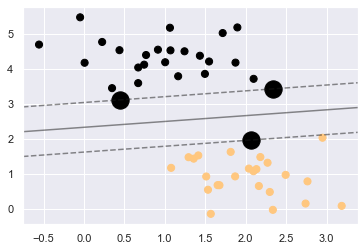

In [30]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "copper")
plt_svc(model, plot_support=True)

Es clave establecer dónde está el soporte. De ello va a depender la ubicación del hiperplano. Cualquier punto que quede más allá de las rectas delimitadas por los soportes se puede clasificar correctamente.

Técnicamente, estos puntos no contribuyen a que la función cambie independientemente de lo que hay más allá de los mismos.

In [33]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200,centers=2,random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X,Y)
    
    ax=ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='copper')
    ax.set_xlim(-1,4)
    ax.set_ylim(1,6)
    plt_svc(model, ax)

Vectores de soporte:
 [[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
Vectores de soporte:
 [[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


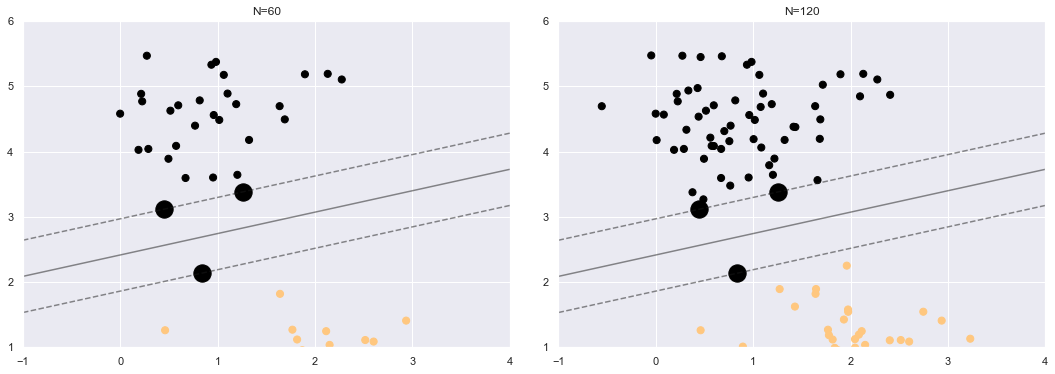

In [34]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for ax_i, N, in zip(ax, [60,120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

Vemos como los soportes en ambos casos son los mismos, ya que lo único que hemos hechos ha sido añadir puntos más allá de los márgenes, lo cual demuestra la insensibilidad del modelo a los puntos que no forman parte del soporte.

Este es el comportamiento que buscaremos también en espacios vectoriales con un mayor número de dimensiones.

Podemos hacer una representación para jugar con el mismo concepto de manera interactiva de la siguiente forma.

In [35]:
from ipywidgets import interact, fixed

In [38]:
interact(plot_svm, N=[10,200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>